# **Loan Status Prediction Project**

This project aims to predict the status of a loan application based on various applicant attributes using a machine learning model. The project involves data collection, preprocessing, analysis, visualization, model training, and evaluation to build an accurate predictive system.

**Steps and Methodology:**

1.	Importing Dependencies:
 *	Libraries such as numpy, pandas, seaborn, and scikit-learn are imported for data manipulation, visualization, and machine learning tasks.
2.	Data Collection:
 *	The dataset is loaded into a pandas DataFrame .
 * Basic exploration is done to understand the structure and contents of the dataset.
3.	Handling Missing Values:
 * Missing values are identified and dropped to ensure data consistency.
4.	Data Analysis and Visualization:
 *	Summary statistics and data types are checked using describe and info methods.
 *	Visualizations are created using seaborn to analyze the relationship between features like Education, Marital Status, and Loan Status.
5.	Data Preprocessing:
 *	Inconsistent data in the 'Dependents' feature is cleaned.
 *	Categorical features are label encoded to convert them into numerical values suitable for the model.
 *	Standardization is applied to numerical features .
 *	Features (X) and the target variable (Y) are separated. .
6.	HyperParameter Selection for SVC Model:
 *	A GridSearchCV is used to find the best hyperparameters for the SVC model by evaluating different combinations of parameters using cross-validation.
7.	Model Training:
 *	The dataset is split into training and test sets.
 *	An SVC model with the best parameters found in the previous step is trained on the training data.
8.	Model Evaluation:
 *	The trained model's accuracy is evaluated on both training and test data to ensure it performs well.
9.	Predictive System:
 *	A function predict_loan_status is created to predict the loan status for new input data. It preprocesses the input data, applies the trained model, and prints whether the loan is likely to be approved ('Yes') or not ('No').



### **1.	Importing Dependencies:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### **2.	Data Collection:**

[Link to dataset](https://www.kaggle.com/datasets/ninzaami/loan-predication)

In [ ]:
loan_dataset = pd.read_csv('/content/loan_status_dataset.csv')

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
loan_dataset.shape

(614, 13)

### **3.	Handling Missing Values:**

In [ ]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_dataset = loan_dataset.dropna()

In [ ]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
loan_dataset.shape

(480, 13)

### **4.	Data Analysis and Visualization:**

In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [ ]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


<Axes: xlabel='Education', ylabel='count'>

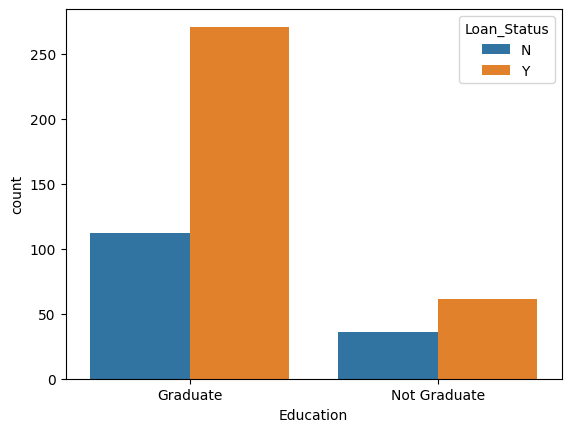

In [ ]:
# Education and Loan status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

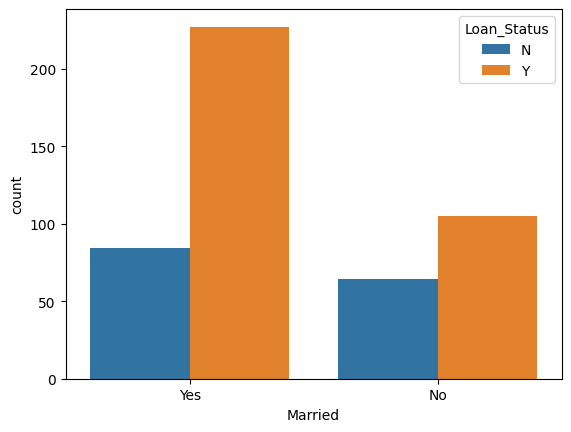

In [ ]:
# marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

### **5.	Data Preprocessing:**

In [ ]:
loan_dataset['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [ ]:
#When a feature contains different datatypes, it can cause issues in machine learning models.
#the Dependents feature has values like '0', '1', '2', and '3+',
#we should replace '3+' with 3  to maintain consistency.
loan_dataset['Dependents'] = loan_dataset['Dependents'].replace(to_replace='3+',value=3)

In [ ]:
loan_dataset['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

In [ ]:
#Label encoding
label_encoder = LabelEncoder()

In [ ]:
needed_label_encoding_columns = ['Gender'	,'Married','Education',	'Self_Employed','Property_Area',	'Loan_Status']

In [ ]:
tracker = {}
for column in needed_label_encoding_columns:
  loan_dataset[column] = label_encoder.fit_transform(loan_dataset[column])
  tracker[column] = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# track and reference the original categories and their corresponding encoded values.
for column, categories in tracker.items():
  print(f'{column} : {categories}')

Gender : {'Female': 0, 'Male': 1}
Married : {'No': 0, 'Yes': 1}
Education : {'Graduate': 0, 'Not Graduate': 1}
Self_Employed : {'No': 0, 'Yes': 1}
Property_Area : {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
Loan_Status : {'N': 0, 'Y': 1}


In [ ]:
#data standardization
scaler = StandardScaler()

In [ ]:
needed_standardization_columns = ['ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term']

In [ ]:
loan_dataset[needed_standardization_columns] = scaler.fit_transform(loan_dataset[needed_standardization_columns])

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,0
2,LP001005,1,1,0,0,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,2,1
3,LP001006,1,1,0,1,0,-0.491180,0.297100,-0.307562,0.275542,1.0,2,1
4,LP001008,1,0,0,0,0,0.112280,-0.604633,-0.046446,0.275542,1.0,2,1
5,LP001011,1,1,2,0,1,0.009319,0.999978,1.520245,0.275542,1.0,2,1


In [ ]:
# splitting data and labels
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'])
Y = loan_dataset.Loan_Status

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0
2,1,1,0,0,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,2
3,1,1,0,1,0,-0.491180,0.297100,-0.307562,0.275542,1.0,2
4,1,0,0,0,0,0.112280,-0.604633,-0.046446,0.275542,1.0,2
5,1,1,2,0,1,0.009319,0.999978,1.520245,0.275542,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,-0.435196,-0.604633,-0.916831,0.275542,1.0,0
610,1,1,3,0,0,-0.222210,-0.604633,-1.302286,-2.487549,1.0,0
611,1,1,1,0,0,0.478206,-0.512854,1.346168,0.275542,1.0,2
612,1,1,2,0,0,0.391846,-0.604633,0.525520,0.275542,1.0,2


In [ ]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

### **6.	HyperParameter Selection for SVC Model:**

In [ ]:
params = {
    'C':[1,5,10],
    'kernel' : ['linear','poly','rbf','sigmoid']
}

In [ ]:
classifier = GridSearchCV(SVC(),params,cv=5)

In [ ]:
classifier.fit(X,Y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
result = pd.DataFrame(classifier.cv_results_)

In [ ]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011432,0.000694,0.005282,0.000279,1,linear,"{'C': 1, 'kernel': 'linear'}",0.802083,0.781250,0.770833,0.864583,0.822917,0.808333,0.033333,1
1,0.019418,0.004195,0.006011,0.000157,1,poly,"{'C': 1, 'kernel': 'poly'}",0.791667,0.729167,0.760417,0.791667,0.729167,0.760417,0.027951,9
2,0.018266,0.002693,0.007939,0.001408,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.802083,0.770833,0.760417,0.833333,0.802083,0.793750,0.025853,5
3,0.018620,0.000911,0.006784,0.000400,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.729167,0.697917,0.687500,0.760417,0.729167,0.720833,0.025853,10
4,0.018944,0.007999,0.011198,0.005622,5,linear,"{'C': 5, 'kernel': 'linear'}",0.802083,0.781250,0.770833,0.864583,0.822917,0.808333,0.033333,1


In [ ]:
classifier.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
classifier.best_score_

0.8083333333333333

### **7.	Model Training:**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [ ]:
model = SVC(C=1,kernel='linear')

In [ ]:
model.fit(X_train,Y_train)

SVC(C=1, kernel='linear')

### **8.	Model Evaluation:**

In [ ]:
#accuracy on training data
train_data_prediction = model.predict(X_train)
accuracy_on_training_data = accuracy_score(Y_train,train_data_prediction)
print('accuracy on training data : ',round(accuracy_on_training_data*100,2),'%')

accuracy on training data :  80.56 %


In [ ]:
#accuracy on test data
test_data_prediction = model.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test,test_data_prediction)
print('accuracy on test data : ',round(accuracy_on_test_data*100,2),'%')

accuracy on test data :  83.33 %


### **9. Predictive system**

In [ ]:
def predict_loan_status(input_data):
  input_data = np.asarray(input_data)
  input_data = input_data.reshape(1,-1)
  df_input_data = pd.DataFrame(input_data,columns=loan_dataset.columns[1:-1])
  needed_label_encoding_columns = ['Gender'	,'Married','Education',	'Self_Employed','Property_Area']
  for column in needed_label_encoding_columns:
    df_input_data[column] = label_encoder.fit_transform(df_input_data[column])
  needed_standardization_columns = ['ApplicantIncome',	'CoapplicantIncome',	'LoanAmount',	'Loan_Amount_Term']
  df_input_data[needed_standardization_columns] = scaler.fit_transform(df_input_data[needed_standardization_columns])
  label = model.predict(df_input_data)
  if(label[0] == 0) :
    print('No')
  else :
    print('Yes')

In [ ]:
predict_loan_status(('Male','Yes',0,'Not Graduate','No',2583,2358,120,360,1,'Urban'))

Yes
